In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("football coursework.csv")

In [3]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [4]:
data.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [5]:
data.shape

(461, 17)

In [6]:
data['fpl_sel'] = data['fpl_sel'].replace('%','',regex = True).astype('float')

In [7]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float64
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 61.4+ KB


In [9]:
data['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [10]:
data['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [11]:
data['region'].unique()

array([ 3.,  2.,  1.,  4., nan])

In [12]:
data['new_foreign'].unique()

array([0, 1], dtype=int64)

In [13]:
data['age_cat'].unique()

array([4, 6, 2, 3, 1, 5], dtype=int64)

In [14]:
data['big_club'].unique()

array([1, 0], dtype=int64)

In [15]:
data.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,3.244252,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,5.675657,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,0.200000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,1.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,3.300000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,45.000000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [16]:
corr = data.corr()
corr

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,-0.003018,0.187785,0.086430,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,0.017437,-0.084682,-0.062474,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.548703,0.615155,0.101659,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.524926,0.542464,0.031055,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.504888,0.618837,0.082429,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_sel,-0.003018,0.017437,0.548703,0.524926,0.504888,1.000000,0.517008,-0.053243,0.079416,-0.010506,-0.033063,0.269498,-0.026993
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,0.517008,1.000000,-0.006712,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.086430,-0.062474,0.101659,0.031055,0.082429,-0.053243,-0.006712,1.000000,0.050903,0.089980,0.068671,0.039080,0.176746
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,0.079416,-0.204837,0.050903,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,-0.010506,0.176572,0.089980,-0.113998,1.000000,-0.004668,-0.113835,-0.076102


<AxesSubplot:>

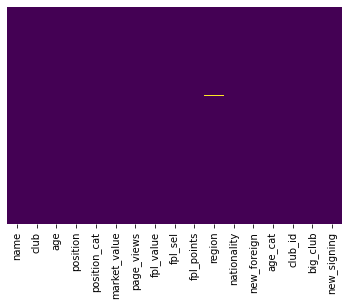

In [17]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap= 'viridis')

<AxesSubplot:>

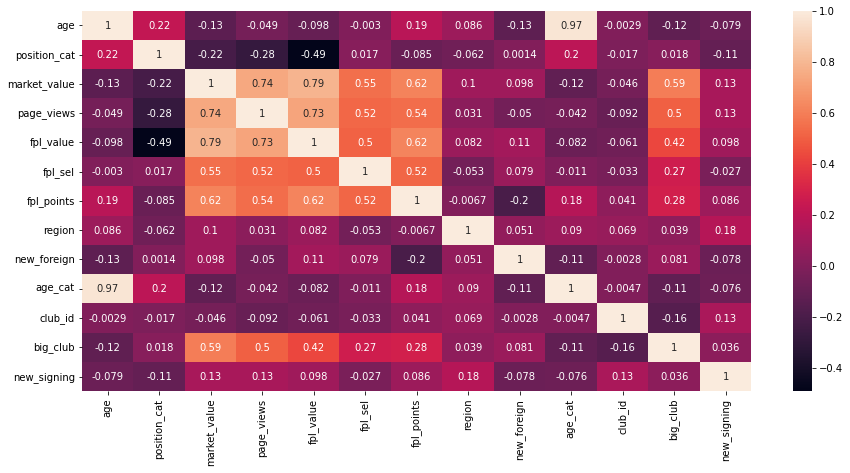

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, annot= True)

In [19]:
data.corr()['market_value'].sort_values()

position_cat   -0.217637
age            -0.132396
age_cat        -0.117682
club_id        -0.046068
new_foreign     0.098056
region          0.101659
new_signing     0.131321
fpl_sel         0.548703
big_club        0.593483
fpl_points      0.615155
page_views      0.739657
fpl_value       0.788653
market_value    1.000000
Name: market_value, dtype: float64

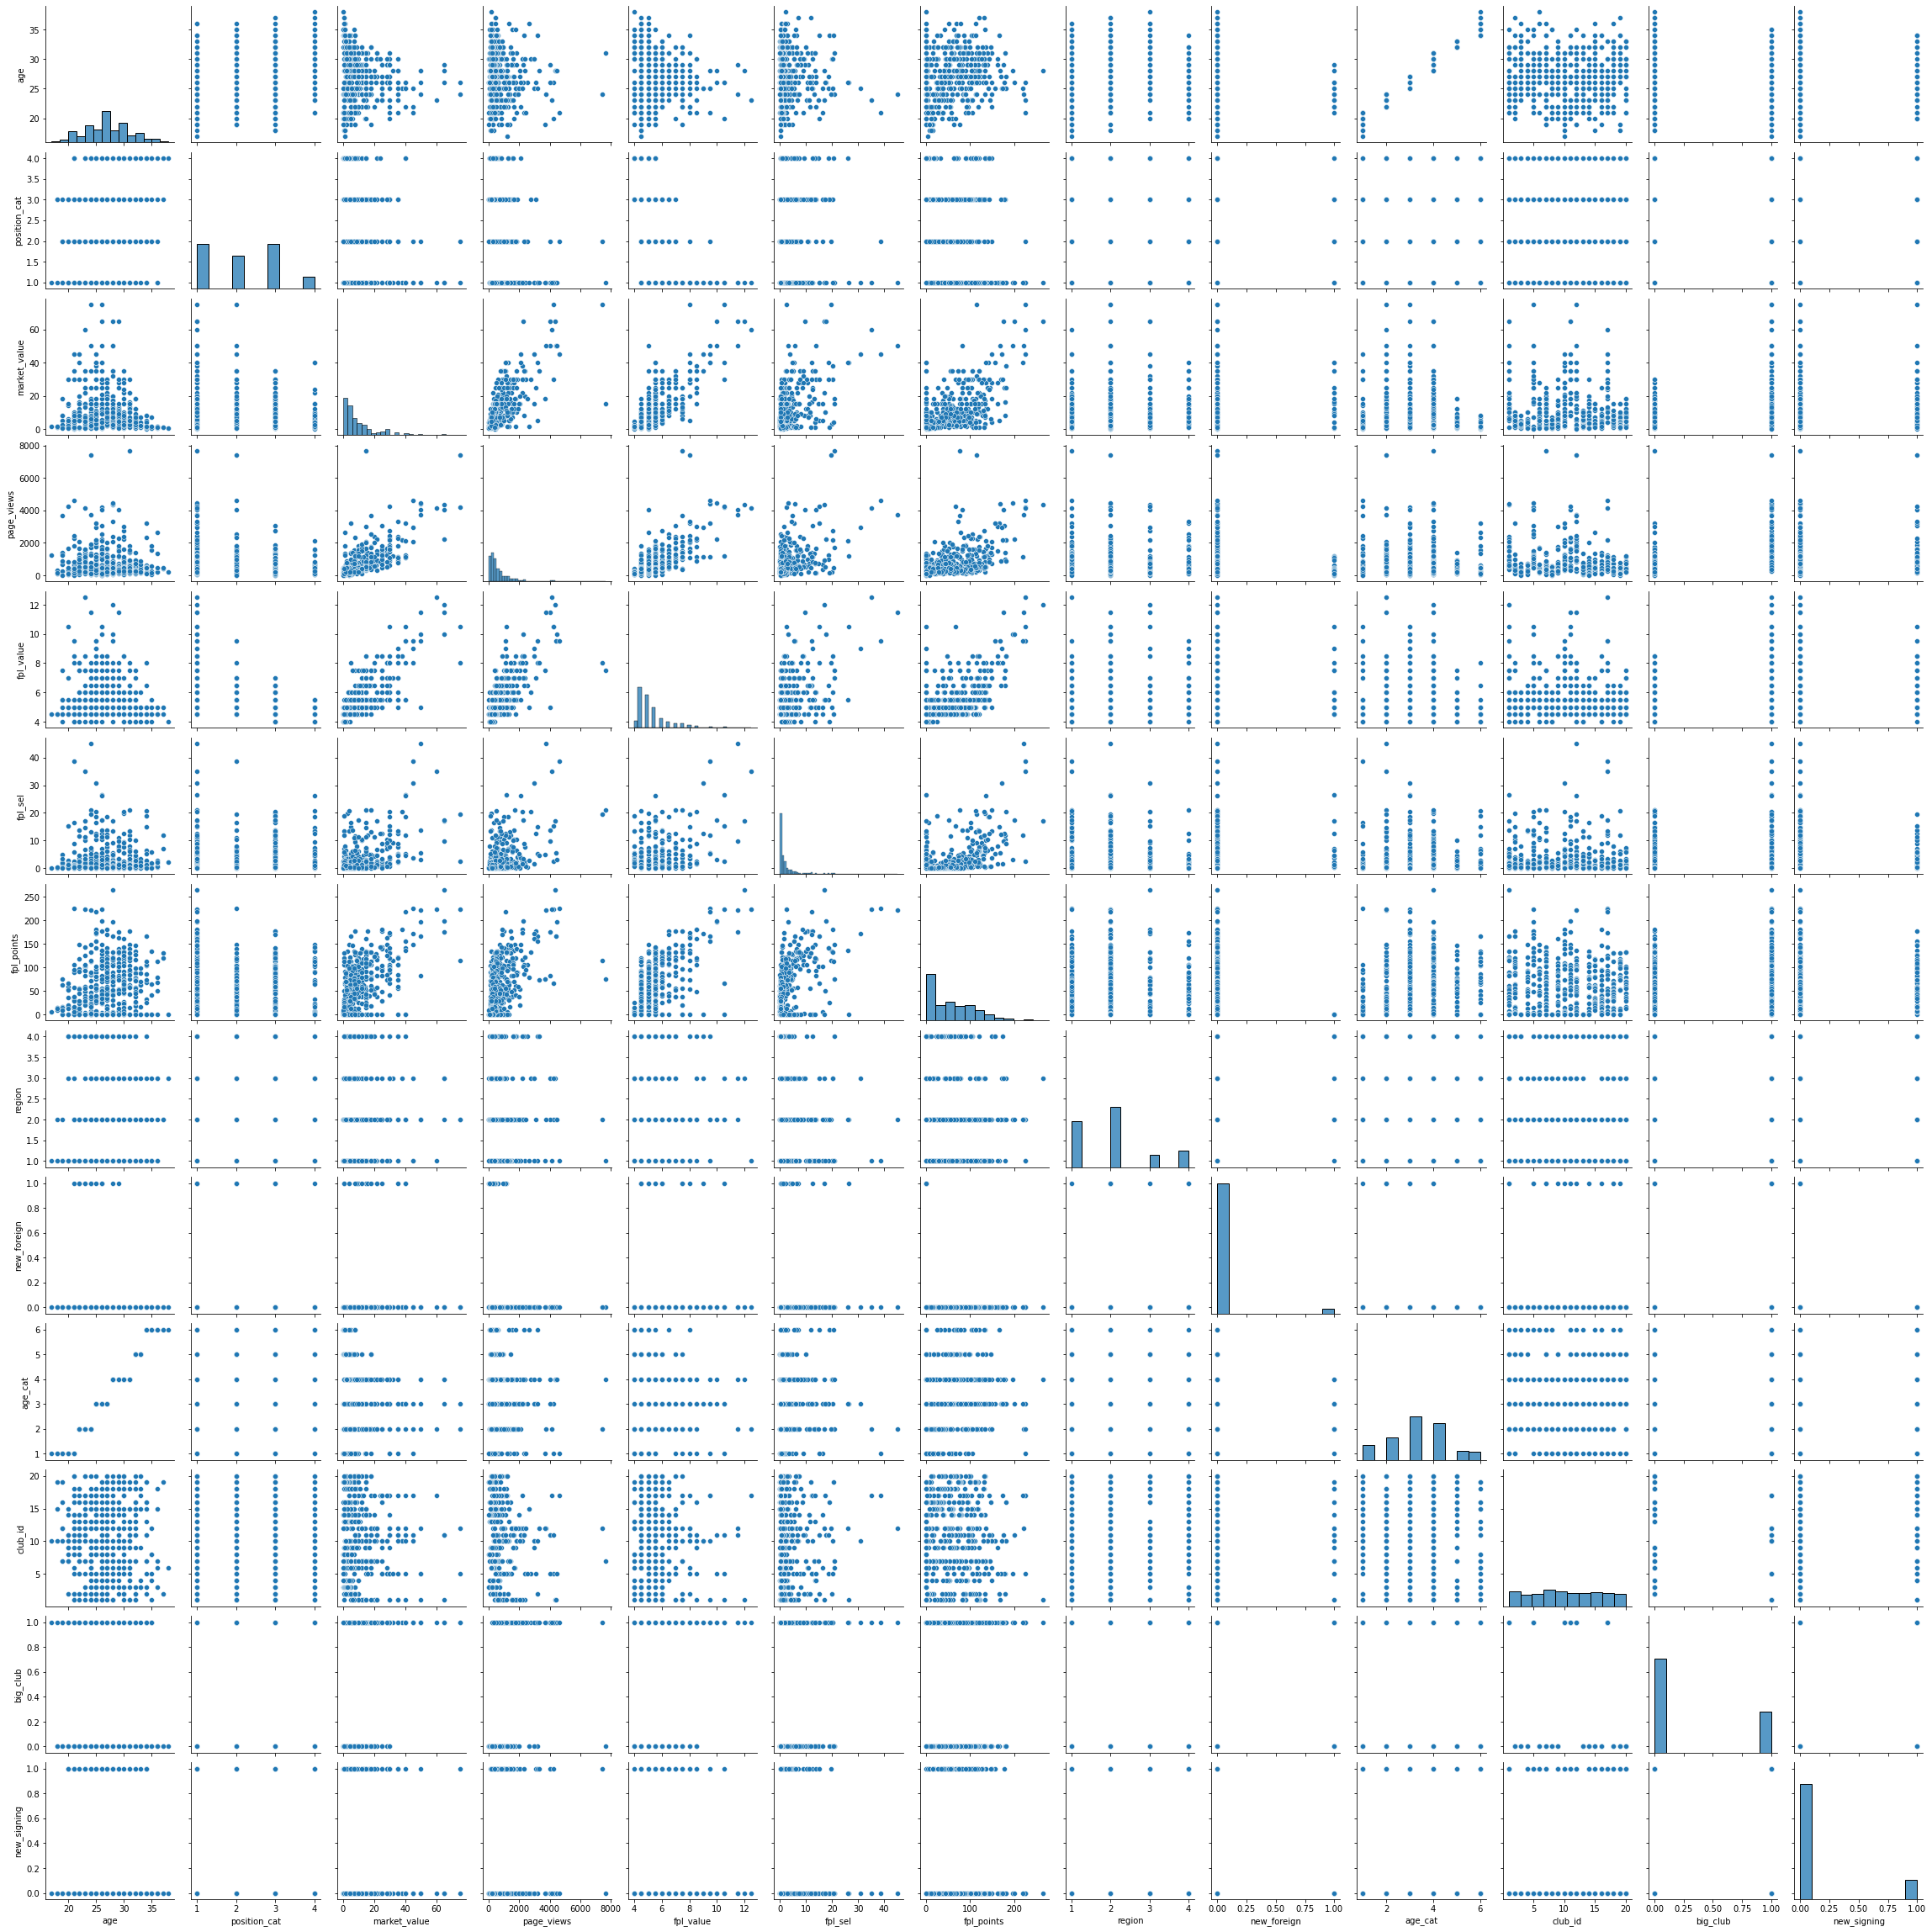

In [20]:
sns.pairplot(data)

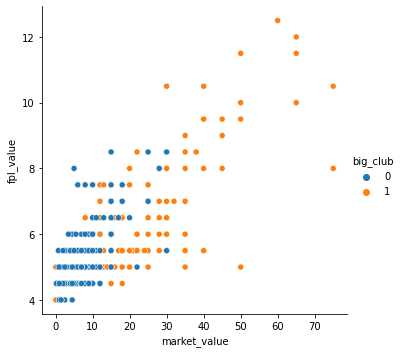

In [21]:
sns.relplot(x = "market_value", y= "fpl_value", hue="big_club", data= data)

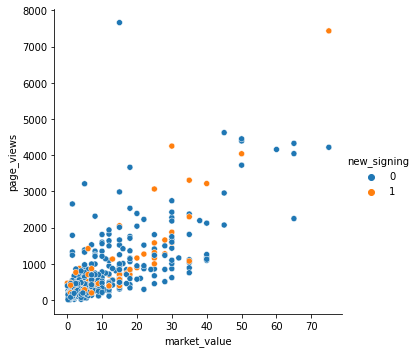

In [22]:
sns.relplot(x = "market_value", y= "page_views", hue="new_signing", data= data)

<AxesSubplot:xlabel='market_value', ylabel='count'>

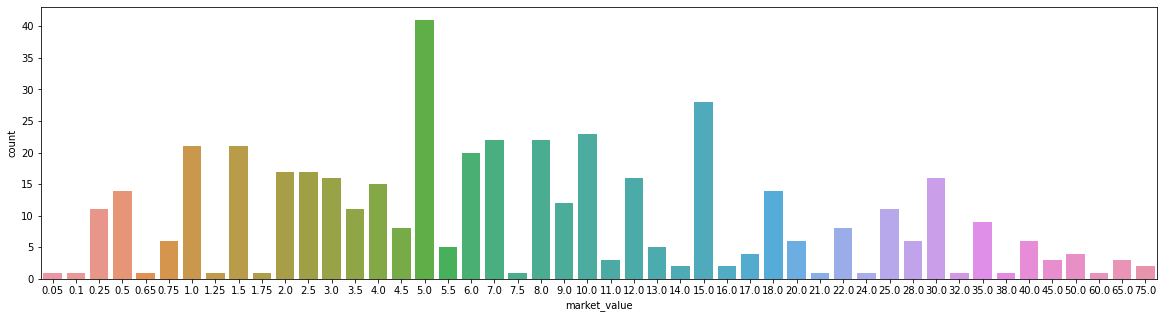

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(x=data['market_value'])

<AxesSubplot:xlabel='market_value', ylabel='count'>

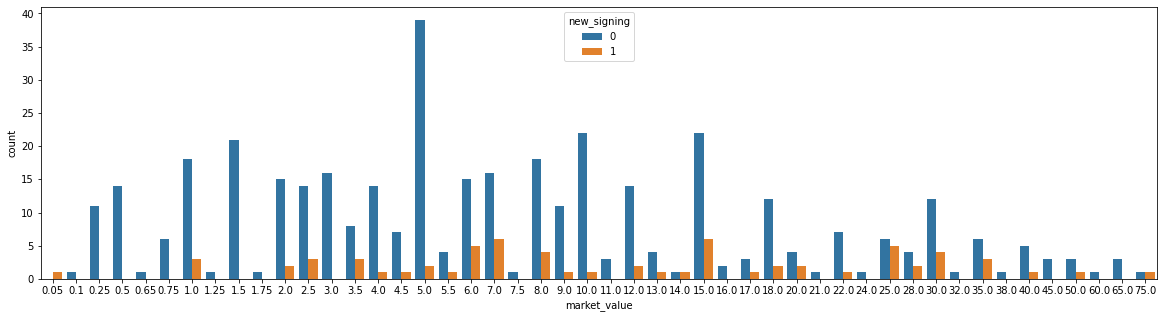

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(x="market_value",hue="new_signing",data=data)

In [28]:
data=data.drop(columns=['name','region','new_foreign','age_cat','club_id','nationality'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [30]:
encoded_data=data.copy()
label_encoder=preprocessing.LabelEncoder()
encoded_data['club']=label_encoder.fit_transform(encoded_data['club'])
encoded_data['position']=label_encoder.fit_transform(encoded_data['position'])
encoded_data.head()

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,big_club,new_signing
0,0,28,8,1,65.0,4329,12.0,17.1,264,1,0
1,0,28,0,1,50.0,4395,9.5,5.6,167,1,0
2,0,35,5,4,7.0,1529,5.5,5.9,134,1,0
3,0,28,11,1,20.0,2393,7.5,1.5,122,1,0
4,0,31,1,3,22.0,912,6.0,0.7,121,1,0


In [33]:
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_data[encoded_data.columns[~encoded_data.columns.isin(['market_value'])]])
Y = encoded_data['market_value']

In [34]:
np.random.seed(40) 
x_train, x_test,y_train,y_test= train_test_split(X, Y, test_size = 0.3)

LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
linearRegression = LinearRegression(normalize=True)
print(linearRegression.get_params())
print(linearRegression.fit(x_train,y_train))
pred_linear = linearRegression.predict(x_test)
print("MSE score:",mean_squared_error(y_test,pred_linear))
lr_r2 = r2_score(y_test,pred_linear)
print("R2 score:",lr_r2)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
LinearRegression(normalize=True)
MSE score: 25.314865950766944
R2 score: 0.7776303358424608


C:\Users\chira\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [44]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(x_train,y_train)
pred_tree = DecisionTree.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_tree)))
tree_r2 = r2_score(y_test, pred_tree)
print("R2 score:",tree_r2)

MSE score: 7.773582130311009
R2 score: 0.46918609506853504


In [45]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
randomForest.fit(x_train,y_train)
pred_forest = randomForest.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_forest)))
rf_r2 = r2_score(y_test, pred_forest)
print("R2 score:",rf_r2)


MSE score: 5.171943926457176
R2 score: 0.7650326475045339


In [46]:
C=[100000,150000,200000,250000 ]
for i in C:
    svr_Model = SVR(C = i).fit(x_train, y_train)
    r2_train_svr = svr_Model.score(x_train, y_train)
    r2_test_svr = svr_Model.score(x_test, y_test)
    print('C = {:.2f}\n \
SVR R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(i, r2_train_svr, r2_test_svr))

C = 100000.00
 SVR R2 training: 1.00, R2 test: 0.26

C = 150000.00
 SVR R2 training: 1.00, R2 test: 0.14

C = 200000.00
 SVR R2 training: 1.00, R2 test: 0.11

C = 250000.00
 SVR R2 training: 1.00, R2 test: 0.09

